In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 

In [20]:



def make_blobs(n_samples_per_class=[25, 50], n_features=2, centers=2, cluster_std=1.05, random_state=None):
    np.random.seed(random_state)
    X = []
    y = []
    for i in range(centers):
        mean = np.random.randn(n_features) * 10
        cov = np.eye(n_features) * cluster_std
        cluster_samples = np.random.multivariate_normal(mean, cov, n_samples_per_class[i])
        X.append(cluster_samples)
        y.append(np.full(n_samples_per_class[i], i))
    X = np.vstack(X)
    y = np.hstack(y)
    return X, y

# تولید داده‌ها
X, y = make_blobs()

# ذخیره داده‌ها در یک دیتافریم
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['label'] = y

# نمایش دیتافریم
df

,feature_0,feature_1,label
0,-3.974521,2.920944,0
1,-4.807974,3.158662,0
2,-4.786125,3.608868,0
3,-3.952583,3.528093,0
4,-3.086751,1.714326,0
...,...,...,...
70,0.123132,-0.767030,1
71,-2.242953,-0.118446,1
72,-1.625066,0.219985,1
73,-1.126131,-1.042849,1


In [21]:

def train_test_split(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_set_size = int(test_size * X.shape[0])
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]



## Support Vector Machine

### Part 2 

In [22]:
class SVM:
    def __init__(self, learning_rate=0.001, n_iters=1000, lambda_param=0.01):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 or 1

        # Initialize weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    # Update only the weights to enforce a hard margin
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # Update both weights and bias for misclassified samples
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [23]:
def make_blobs(n_samples_per_class=[0, 0], n_features=2, centers=2, cluster_std=1.05, random_state=None):
    np.random.seed(random_state)
    X = []
    y = []
    for i in range(centers):
        mean = np.random.randn(n_features) * 10
        cov = np.eye(n_features) * cluster_std
        cluster_samples = np.random.multivariate_normal(mean, cov, n_samples_per_class[i])
        X.append(cluster_samples)
        y.append(np.full(n_samples_per_class[i], i))
    X = np.vstack(X)
    y = np.hstack(y)
    return X, y

In [24]:
 X, y = make_blobs(n_samples_per_class=[200, 500], n_features=2, centers=2, cluster_std=1.05, random_state=40)
 y = np.where(y == 0, -1, 1)

 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

 clf = SVM()
 clf.fit(X_train, y_train)
 predictions = clf.predict(X_test)


In [25]:
def visualize_svm(clf, X, y):
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        plt.figure(figsize=(10, 6))
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        plt.plot([x0_1, x0_2], [x1_1, x1_2], 'k--')
        plt.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')
        plt.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('SVM Decision Boundary')
        plt.show()

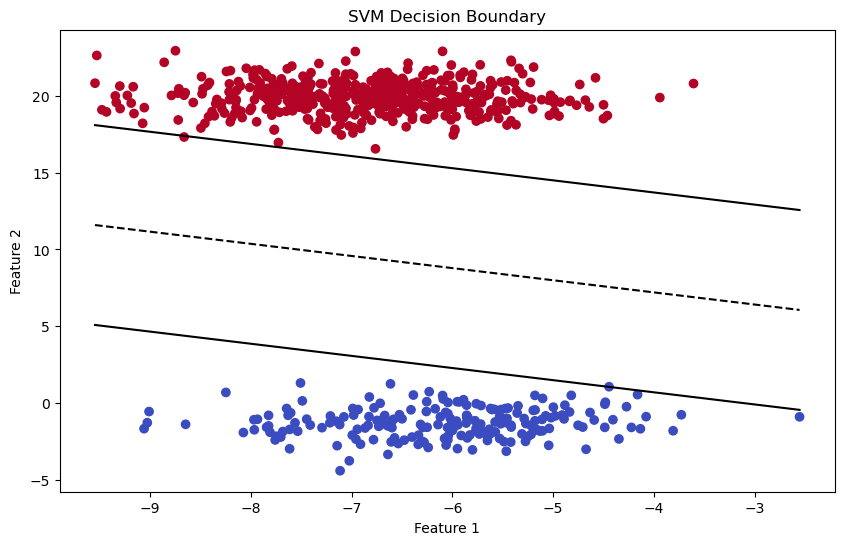

In [26]:
visualize_svm(clf, X, y)


In [169]:

 def accuracy(y_true, y_pred):
     accuracy = np.sum(y_true == y_pred) / len(y_true)
     return accuracy

 print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 0.0


## Part 3

In [30]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        # Determine class weights based on class distribution
        class_weights = {1: 1.0, -1: 1.0}
        unique, counts = np.unique(y_, return_counts=True)
        class_distribution = dict(zip(unique, counts))
        
        if class_distribution[1] > class_distribution[-1]:
            class_weights[1] = 1.5  # بیشتر کردن وزن کلاسی که نمونه‌های بیشتری دارد
            class_weights[-1] = 0.2  # کمتر کردن وزن کلاسی که نمونه‌های کمتری دارد
        else:
            class_weights[1] = 0.2
            class_weights[-1] = 1.5

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]) * class_weights[y_[idx]])
                    self.b -= self.lr * y_[idx] * class_weights[y_[idx]]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [31]:
if __name__ == "__main__":
    X, y = make_blobs(n_samples_per_class=[200, 500], n_features=2, centers=2, cluster_std=1.05, random_state=40)
    y = np.where(y == 0, -1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    clf = SVM()
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)



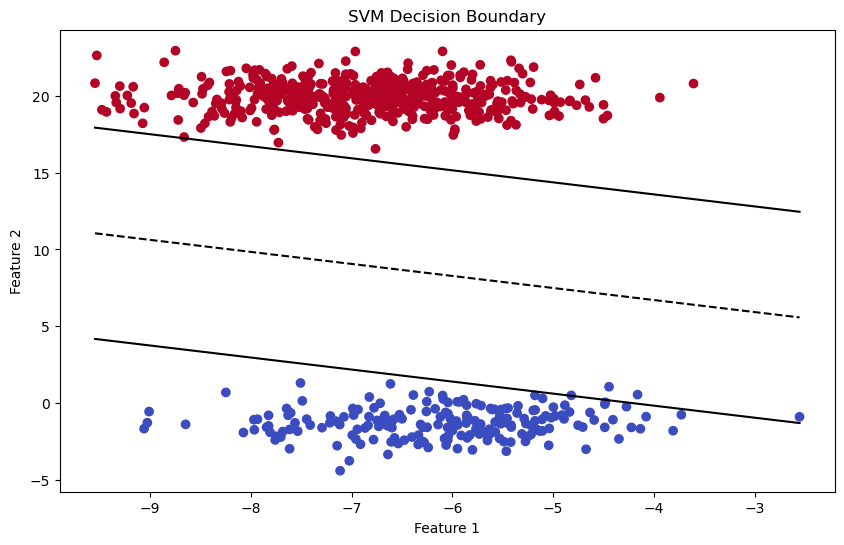

In [32]:
visualize_svm(clf, X, y)